# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print ("Dataset has {} rows, {} columns".format(*data.shape))
print (data.head())  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [17]:
data.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [19]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


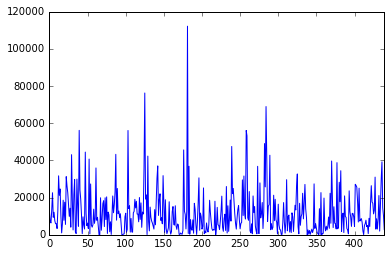

In [23]:
data["Fresh"].plot()

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

**Principal component analysis (PCA)** is a technique used to emphasize variation and bring out strong patterns in a dataset. The first principal component will represents a projection of the data that encompass the largest variance in the data.

** independent component analysis (ICA)** is a technique used to separate a signal into additive subcomponents. In this case the components would not be arranged in a particular hierarchical orders. The components in this case might represents customer types or other fundemental features of the data. 

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = data.shape[1])
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print ("Components", pca.components_)
print ("Variance", pca.explained_variance_ratio_)

Components [[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
Variance [ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


In [18]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:** The first 3 components encompass 93% of the variance in the data. As can be seeing in the figure below the first component encompass ~46% of the variance the second ~40%, the third ~7% and the forth 4%. The other components encompass less than 10% of the variance. I would probably use **the first 4 components**.

The reason: I will want to **include as much variance as possible**, but on the same time there is no much sense to include components that represents 1 or 2 percent of the data. Most probably these **components represents noise or outliers** and would not contribute to the understanding of the data and analysis. 

So I would set a **threshold of 2%**, components that explain less than that will not be included.

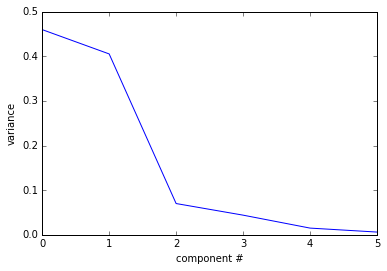

In [3]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('variance')
plt.xlabel('component #')

(-0.25, 1)

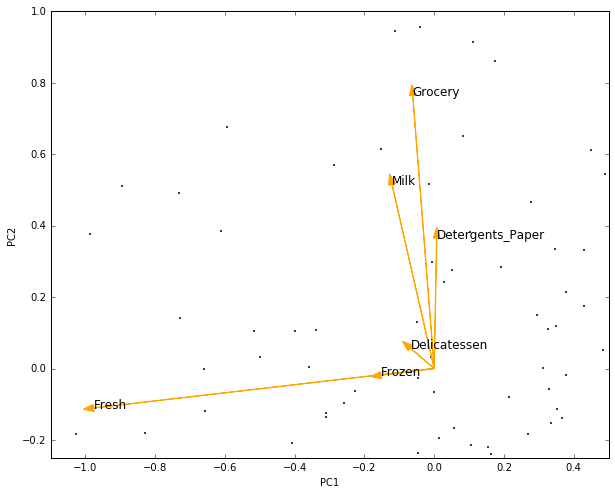

In [4]:
import pandas as pd
from sklearn.decomposition import PCA

def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components = 2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

ax = biplot(data)
ax.set_xlim([-1.1, .5])
ax.set_ylim([-.25, 1])

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represents different principal projection of variance in the data. The first dimension represents the projection of the largest variance of the data that might be something like the average buyer. We can see that "fresh" and "Frozen" are the components that are the most dominant for this dimension. The second dimension will be orthogonal to the first component, but again at the projection that capture the most of the remained variance. Here we find 'Milk', 'Grocery', 'Detergents Paper' as the components that are the most dominant. The next dimension will be constructed on similar principle, orthogonal and explaining the most of the remained variance. Looking at the value we find that the third component encompass some linear combination that is more or less homogeneous. 

This separation of the data into orthogonal components provide an orthogonal basis. The great benefit of such a basis is the possibility to reconstruct the data using only the components that we find interesting or important. This can be useful to remove noise or components that are not relevant information.

### ICA

In [30]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA()
ica.fit_transform((data-data.mean()))  # Reconstruct signals
#ica.fit_transform((data-data.mean())/data.var()) 
# Print the independent components
print (ica.components_)

[[ -3.97566249e-06   8.56672030e-07   6.11813388e-07   6.78527006e-07
   -2.03416548e-06   1.05023652e-06]
 [ -3.86329793e-07  -2.19517878e-07  -6.02172509e-07  -5.22101222e-07
    5.11225399e-07   1.80930846e-05]
 [  8.65330025e-07   1.40017392e-07  -7.74509088e-07  -1.11460174e-05
    5.57397078e-07   5.95264149e-06]
 [ -3.02127169e-07   2.28337208e-06   1.21174888e-05  -1.45935062e-06
   -2.82172800e-05  -5.73526568e-06]
 [  2.12034764e-07  -1.89997013e-06   6.32500803e-06   4.24100760e-07
   -5.75357166e-07  -1.40702664e-06]
 [ -1.53030698e-07  -9.84838406e-06   5.80144709e-06   3.65434699e-07
   -3.28930713e-06   6.06172279e-06]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'

Answer: Each vector seems to represents a different buying patterns, where the valuse represents above or below the average values.  

**1st component:** 

**Low** consumption of **Milk and Detergents_Paper** 

**High** consumption of **Grocery and Delicatessen**. 

**2nd component:**

**Low** consumption of **Detergents_Paper and Delicatessen** 

**High** consumption of  **Grocery and Milk **. 

**3rd component:** 

**Low** consumption of **Detergents_Paper and Delicatessen** 

**High** consumption of **Grocery and Frozen**.

**4rd component:** 

**Low** consumption of **Grocery and Frozen**

**High** consumption of **Fresh and Delicatessen**.

This information can be useful when we want to determine how many independent components encompass in the data set. For example we can decide about the number of k for k mean analysis. 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

For that section I will use the two algorithems because I want to compare the results. Below I discuss the benefits and flaws of each algorithms.

My choice is to use the **Gaussian Mixture Models** the reason for that is the fact that the algorithm maximizes only the likelihood and therefore do not assume any specific structure, where K means have several different assumptions about the structure of the data. In this case we cannot assume much about the structure of the data, mainly because we do not know the data. The data include different type of customers that might have different size or buying patterns. 

**Gaussian Mixture Models :** 

Advantages
 1. The fastest algorithm for learning mixture models
 2. The algorithem maximizes only the likelihood, therfore it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
 
Disadvantages 
 1. when one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
 2. this algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [35]:
%matplotlib inline
def boundary_labels_data(reduced_data, centroids): 
# Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [31]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

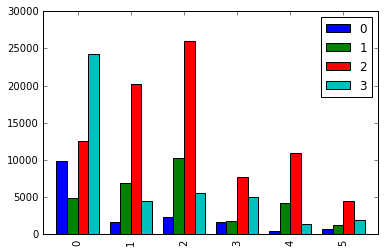

In [82]:
## Just a Test 
pca = PCA(n_components=4).fit(data)
reduced_data=pca.transform(data)
clusters =  GMM(n_components=4).fit(reduced_data)
centroids =clusters.means_

DF=pd.DataFrame(( pca.inverse_transform(centroids)).transpose())
DF.plot(kind='bar',width=0.8)

In [55]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca = PCA(n_components=2).fit(data)
reduced_data=pca.transform(data)
print (reduced_data[:10])  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [39]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters =  GMM(n_components=4).fit(reduced_data)
print (clusters)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [40]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids =clusters.means_
print (centroids)

[[  2336.74338421  -6721.26945836]
 [-15313.48033345  -3338.2980532 ]
 [ -9418.46902103  34454.41705257]
 [  7182.42527042   5428.27138593]]


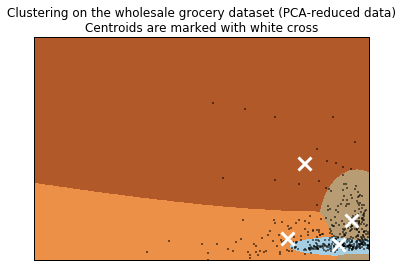

In [36]:
boundary_labels_data(reduced_data, centroids)

[[  2336.74338421  -6721.26945836]
 [-15313.48033345  -3338.2980532 ]
 [ -9418.46902103  34454.41705257]
 [  7182.42527042   5428.27138593]]
[[ 10461.84724846   2046.24453768   2668.34762352   2841.7401855
     442.3560535     982.08245096]
 [ 27323.73752904   5930.11445253   6341.19086536   5467.66889137
    1553.81949605   2377.24316943]
 [ 17386.64381576  24709.29701744  34874.96082654   3861.86755204
   15403.00120879   4132.94357528]
 [  4385.95277825   7725.784475    11659.75895933   1875.94833342
    4915.38234541   1345.55492231]]


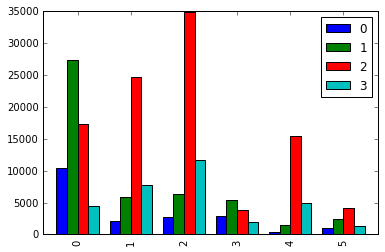

In [79]:
print(centroids)
print(pca.inverse_transform(centroids))
DF=pd.DataFrame(( pca.inverse_transform(centroids)).transpose())
DF.plot(kind='bar',width=0.8)
#PCA.inverse_transform(centroids)

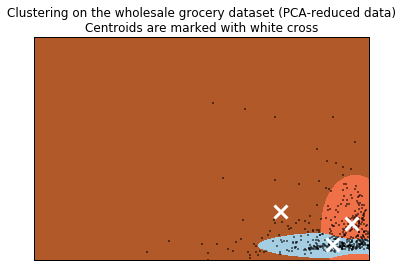

In [37]:
clusters =  GMM(n_components=3).fit(reduced_data)
centroids =clusters.means_


boundary_labels_data(reduced_data, centroids)

We can see clearly 3 or 4 clusters in the data. The most prominent two clusters are on the bottom right . The other clusters (or cluster for the case of 3 ) the data is more sporadic and it is not clear if that is a real cluster.

**K Means clustering :** 

Advantages
 1. the problem K means try to solve is computational difficult but there are efficient and fast heuristic algorithems. 
 2. Simple to implement and run. 
 3.  Easy to understand, therefore might helps to get a better understanding of the problem. 
 
Disadvantages 
 1. The Algorithem might convergance to a local minimum that might be wrong result.
 2. The number of clusters are given as an input, wrong number might couse poor results, more or less clusters tharen realy are in the data.
 3. The algorithem asume seperable, spherical and similar size clusters that are seperable,That might couse a failure to classify when data do not satisfy the assumptions. 

In [13]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters =   KMeans(n_clusters=4).fit(reduced_data)
print (clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [14]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids =clusters.cluster_centers_
print (centroids)

[[  5710.98964991  12661.45687292]
 [  3542.08605212  -4936.7212132 ]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]]


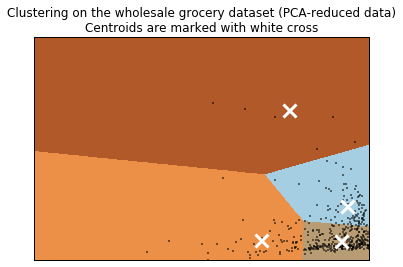

In [15]:
boundary_labels_data(reduced_data, centroids)

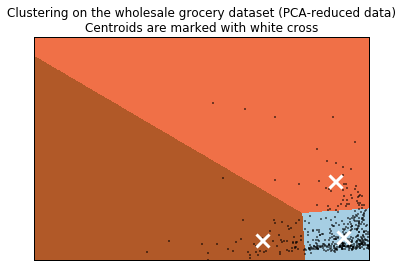

In [16]:
clusters =   KMeans(n_clusters=3).fit(reduced_data)
centroids =clusters.cluster_centers_
boundary_labels_data(reduced_data, centroids)

For the case of 4 clusters we find similar patern as we reveal for the **UGaussian Mixture Models**. However, the 3 cluster are seperated differently. I find this very intresting. It seems that the many assumptions about the data structures for the K means are responsible for this diferance. 

I find the visualization quite clear, mainly becouse we are not intrested in small detailes. But we can easily improve the visualization using a log scale or simple zoom in. 

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Each cluster represents a coustomer type. 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: This is difficult to answer because each algorithm gave a different perspective about the data.

The **PCA** provide us the ability to find general trends in the data and differant variance patterns. We use this information to simplify our data set by removing unwanted or not relevant patterns.

The **ICA** provide us with different type of customers or buyer types. Using this information we could understand better what type or how many types of customers the data set might encompass.

The **clustering algorithms** used the simplified data to separate the customers to different classes and label each customer. This again a very important step in the analysis because we can use this information get plan a better experiments and perhaps even build a prediction model.

**9)** How would you use that technique to help the company design new experiments?

Answer: The classification reveal additional information about the data set. The buyers does not distribute homogeneously, instead there are different patterns of buying. Fortunately enough we could detect these patterns and labels each client accordingly. One way for a new experiment will be to choose a 'test group' within each label, for example 20% from each class. For this 'test group' we can change small number of features, for example delivery time. That will enable us to compare the response to the change in the 'test group' and seperatly in the control group (the other 80%). The results can be different in each class, but then we can decide for each class if the change is beneficial or not.


**10)** How would you use that data to help you predict future customer needs?

Answer: For prediction it is important to have some labels, this data does not include labeling. Other than the customer ID we do not really know what class or type is each customer. One way to overcome this will be to use as labels from the clustering analysis. Obviously the edges of the clusters might be problematic and might introduce error to the training. However, we can choose data points (or customers) that are closer to the center of each cluster and remove the data points on the edges.

The training on these groups will provide us with a model. The model can be tested on a separate test sample (that will not be used for the training procedure).If the model performance is high enough we can use this model for prediction.